### Библиотеки и датасет

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, r2_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.decomposition import PCA
import pandas as pd

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

X = wine_data.drop(columns='quality')
y_classification = wine_data['quality']
y_regression = wine_data['alcohol']  # Используем содержание алкоголя для регрессии/

In [9]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.3, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_cls, y_train_cls)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(random_state=42)

### Оценка качества модели

In [10]:
y_pred_cls = dt_classifier.predict(X_test_cls)
classification_accuracy = accuracy_score(y_test_cls, y_pred_cls)
print("Accuracy (Classification):", classification_accuracy)
print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))

# Оценка качества модели регрессии
y_pred_reg = dt_regressor.predict(X_test_reg)
regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)
print("MSE (Regression):", regression_mse)
print("R2 Score (Regression):", regression_r2)

Accuracy (Classification): 0.5729166666666666
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.66      0.65      0.65       195
           6       0.57      0.60      0.59       200
           7       0.46      0.43      0.44        61
           8       0.33      0.17      0.22         6

    accuracy                           0.57       480
   macro avg       0.35      0.32      0.33       480
weighted avg       0.57      0.57      0.57       480

MSE (Regression): 0.00026562499999999904
R2 Score (Regression): 0.9997719346826521


### Масштабирование признаков

In [11]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


### Подбор гиперпараметров

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid_cls = {'max_depth': range(1, 21), 'min_samples_split': range(2, 11)}
grid_search_cls = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_cls, cv=5, scoring='accuracy')
grid_search_cls.fit(X_train_cls_scaled, y_train_cls)

param_grid_reg = {'max_depth': range(1, 21), 'min_samples_split': range(2, 11)}
grid_search_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg_scaled, y_train_reg)

best_dt_classifier = grid_search_cls.best_estimator_
best_dt_regressor = grid_search_reg.best_estimator_

best_dt_classifier.fit(X_train_cls_scaled, y_train_cls)
best_dt_regressor.fit(X_train_reg_scaled, y_train_reg)

DecisionTreeRegressor(max_depth=9, min_samples_split=3, random_state=42)

### Оценка качества улучшенной модели

In [13]:
# Оценка качества улучшенной модели классификации
y_pred_cls_best = best_dt_classifier.predict(X_test_cls_scaled)
best_classification_accuracy = accuracy_score(y_test_cls, y_pred_cls_best)
print("Improved Accuracy (Classification):", best_classification_accuracy)
print("Improved Classification Report:\n", classification_report(y_test_cls, y_pred_cls_best))

# Оценка качества улучшенной модели регрессии
y_pred_reg_best = best_dt_regressor.predict(X_test_reg_scaled)
best_regression_mse = mean_squared_error(y_test_reg, y_pred_reg_best)
best_regression_r2 = r2_score(y_test_reg, y_pred_reg_best)
print("Improved MSE (Regression):", best_regression_mse)
print("Improved R2 Score (Regression):", best_regression_r2)


Improved Accuracy (Classification): 0.55
Improved Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.66      0.64       195
           6       0.50      0.61      0.55       200
           7       0.46      0.21      0.29        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.26      0.25      0.25       480
weighted avg       0.52      0.55      0.53       480

Improved MSE (Regression): 0.00020326967592592733
Improved R2 Score (Regression): 0.9998254728916809


c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### Визуализация результатов

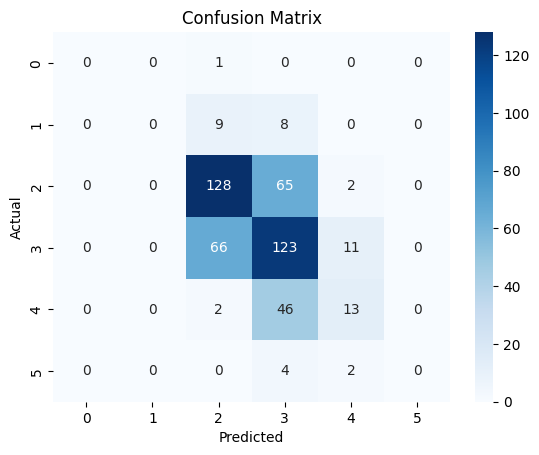

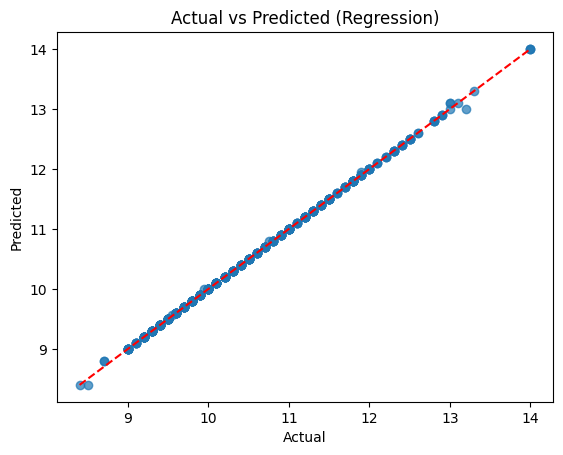

In [14]:
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.scatter(y_test_reg, y_pred_reg_best, alpha=0.7)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.title("Actual vs Predicted (Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Реализация алгоритма решающего дерева вручную

In [51]:
class DecisionTreeManual:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf

    def fit(self, X, y):
        # Убедимся, что X и y - это numpy массивы
        X = np.array(X)
        y = np.array(y)
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        # Базовые случаи: если все классы одинаковые или глубина дерева достигла максимума
        if len(set(y)) == 1:
            return {'leaf': True, 'value': y[0]}

        if len(X) < self.min_samples_split or (self.max_depth and depth >= self.max_depth):
            return {'leaf': True, 'value': np.mean(y)}

        # Разбиение по всем признакам для поиска наилучшего
        best_gini = float('inf')
        best_split = None
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]

                # Проверка на минимальное количество образцов в левой и правой ветви
                if len(left_y) < self.min_samples_leaf or len(right_y) < self.min_samples_leaf:
                    continue

                gini = self._gini_impurity(left_y, right_y)
                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature_index, threshold)

        if best_split is None:
            return {'leaf': True, 'value': np.mean(y)}

        feature_index, threshold = best_split
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {'leaf': False, 'feature_index': feature_index, 'threshold': threshold,
                'left': left_tree, 'right': right_tree}

    def _gini_impurity(self, left_y, right_y):
        left_size, right_size = len(left_y), len(right_y)
        total_size = left_size + right_size
        left_gini = 1 - sum((np.sum(left_y == c) / left_size) ** 2 for c in set(left_y))
        right_gini = 1 - sum((np.sum(right_y == c) / right_size) ** 2 for c in set(right_y))
        return (left_size / total_size) * left_gini + (right_size / total_size) * right_gini

    def predict(self, X):
        # Убедимся, что X - это numpy массив
        X = np.array(X)
        return np.array([self._predict_one(x, self.tree) for x in X])

    def _predict_one(self, x, node):
        if node['leaf']:
            return node['value']
        if x[node['feature_index']] <= node['threshold']:
            return self._predict_one(x, node['left'])
        else:
            return self._predict_one(x, node['right'])

### Обучение и результаты

Manual Decision Tree Accuracy (Classification): 0.40625
Manual Decision Tree MSE (Regression): 0.20992539030067653
Manual Decision Tree R2 Score (Regression): 0.8197583030275517


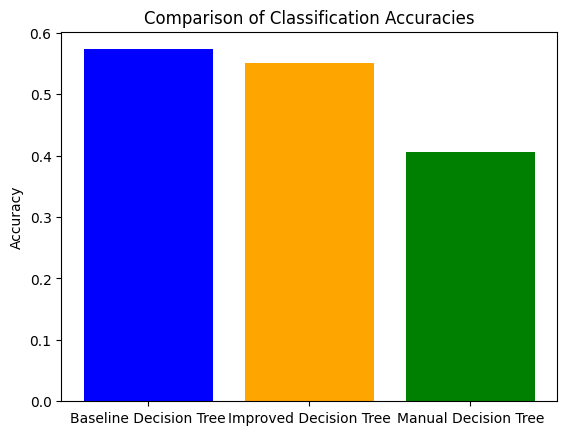

In [65]:
# Обучение и оценка модели с ручной имплементацией
manual_tree_classifier = DecisionTreeManual(max_depth=5)
manual_tree_classifier.fit(X_train_cls_scaled, y_train_cls.to_numpy())
y_pred_manual = manual_tree_classifier.predict(X_test_cls_scaled)
y_pred_manual_cls = np.where(y_pred_manual > 0.0, 5, 0)

manual_accuracy = accuracy_score(y_test_cls, y_pred_manual_cls)
print("Manual Decision Tree Accuracy (Classification):", manual_accuracy)

manual_tree_regressor = DecisionTreeManual(max_depth=5)
manual_tree_regressor.fit(X_train_reg_scaled, y_train_reg.to_numpy())
y_pred_manual_reg = manual_tree_regressor.predict(X_test_reg_scaled)

manual_regression_mse = mean_squared_error(y_test_reg, y_pred_manual_reg)
manual_regression_r2 = r2_score(y_test_reg, y_pred_manual_reg)
print("Manual Decision Tree MSE (Regression):", manual_regression_mse)
print("Manual Decision Tree R2 Score (Regression):", manual_regression_r2)

# Сравнение результатов
accuracies = [classification_accuracy, best_classification_accuracy, manual_accuracy]
labels = ['Baseline Decision Tree', 'Improved Decision Tree', 'Manual Decision Tree']
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.title("Comparison of Classification Accuracies")
plt.ylabel("Accuracy")
plt.show()